In [90]:
## Import stuff
 
import numpy as np
from sklearn import datasets, linear_model, metrics

In [91]:
## Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data # matrix of dimensions 442x10
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [92]:
# train
X = diabetes_X_train
y = diabetes_y_train

n = X.shape[1]
m = X.shape[0]

# train: init
W = np.zeros((n,1))
b = 0

cost_train=[]
iteration_train=[]

learning_rate = 0.1
epochs = 22001

#adding one more column to x in the beginning
X = np.concatenate((np.ones((m,1)), X), axis = 1)
 # initializing the parameter vector...
theta = np.ones((n+1,1))
y=y.reshape(m,1)

 
# train: gradient descent
for i in range(epochs):
    # calculate predictions
    pred = X.dot(theta)
      
    # calculate error and cost (mean squared error)
    mean_squared_error = ((pred-y).transpose().dot(pred-y))/(2*m)
    
    cost_train.append(mean_squared_error[0,0])
    iteration_train.append(i)
   
    # calculate gradients
    grad = (1/m)*X.transpose().dot(pred-y)
 
    # update parameters
    theta=theta-learning_rate*grad
    
    # diagnostic output
    if i % 500 == 0: print("Epoch %d: %f" % (i, mean_squared_error))


Epoch 0: 14571.937953
Epoch 500: 2296.985427
Epoch 1000: 1980.262446
Epoch 1500: 1815.208387
Epoch 2000: 1719.295237
Epoch 2500: 1657.484974
Epoch 3000: 1614.286167
Epoch 3500: 1582.395930
Epoch 4000: 1558.049642
Epoch 4500: 1539.091619
Epoch 5000: 1524.155537
Epoch 5500: 1512.302071
Epoch 6000: 1502.848290
Epoch 6500: 1495.280053
Epoch 7000: 1489.202193
Epoch 7500: 1484.307241
Epoch 8000: 1480.354156
Epoch 8500: 1477.153036
Epoch 9000: 1474.553728
Epoch 9500: 1472.437167
Epoch 10000: 1470.708710
Epoch 10500: 1469.292953
Epoch 11000: 1468.129694
Epoch 11500: 1467.170769
Epoch 12000: 1466.377566
Epoch 12500: 1465.719067
Epoch 13000: 1465.170309
Epoch 13500: 1464.711157
Epoch 14000: 1464.325342
Epoch 14500: 1463.999689
Epoch 15000: 1463.723508
Epoch 15500: 1463.488108
Epoch 16000: 1463.286409
Epoch 16500: 1463.112627
Epoch 17000: 1462.962033
Epoch 17500: 1462.830747
Epoch 18000: 1462.715581
Epoch 18500: 1462.613909
Epoch 19000: 1462.523562
Epoch 19500: 1462.442746
Epoch 20000: 1462.36997

In [93]:
# test
X = diabetes_X_test
y = diabetes_y_test
 
n = X.shape[1]
m = X.shape[0]

X = np.concatenate((np.ones((m,1)), X), axis = 1)

 # initializing the parameter vector...
theta = np.ones((n+1,1))
y=y.reshape(m,1)
cost_test=[]
iteration_test=[]


# calculate predictions + calculate error and cost (same code as above)
for i in range(epochs):
    # calculate predictions
    pred = X.dot(theta)
    
    # calculate error and cost (mean squared error)
    mean_squared_error = ((pred-y).transpose().dot(pred-y))/(2*m)
    
    cost_test.append(mean_squared_error[0,0])
    iteration_test.append(i)
 
    # calculate gradients
    grad = (1/m)*X.transpose().dot(pred-y)
 
    # update parameters
    theta=theta-learning_rate*grad
    
W=theta[1:]
b=theta[0]

print('Coefficients: \n', W)
print("Mean squared error: %.2f" % mean_squared_error)
print("="*120)

Coefficients: 
 [[-283.43542461]
 [-193.76199389]
 [ 550.27849603]
 [ 227.08898772]
 [  72.8500288 ]
 [-148.13383913]
 [-199.0189638 ]
 [  -4.60624043]
 [ 739.02712529]
 [  40.30140553]]
Mean squared error: 720.66


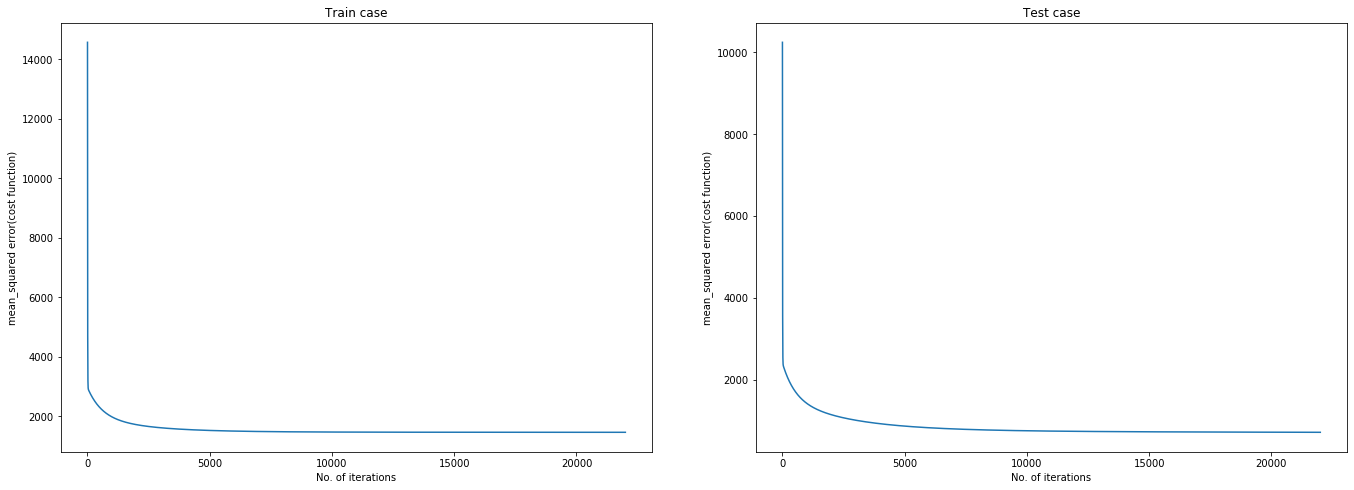

In [94]:
import matplotlib.pyplot as plt

fig, axes= plt.subplots(nrows=1, ncols=2,figsize=(20,8))
axes[0].plot(iteration_train,cost_train)
axes[0].set_xlabel('No. of iterations')
axes[0].set_ylabel('mean_squared error(cost function)')
axes[0].set_title('Train case')
axes[1].plot(iteration_test,cost_test)
axes[1].set_xlabel('No. of iterations')
axes[1].set_ylabel('mean_squared error(cost function)')
axes[1].set_title('Test case')

''' Displaying the plot'''

plt.tight_layout(pad=5.0)
plt.show()